# Machine Learning Project

## Table of Contents
- [Import Data](#import-data)
- [Data Exploration](#data-exploration)
- [Pre-processing](#pre-processing)

<a id="import-data"></a>
## Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/train.csv')
df.head(10)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [12]:
Missing Values 

SyntaxError: invalid syntax (3676515621.py, line 1)

In [ ]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent.round(2)
}).sort_values(by="Missing %", ascending=False)

missing_summary[missing_summary["Missing Count"] > 0]

,Missing Count,Missing %
mpg,7926,10.43
tax,7904,10.40
hasDamage,1548,2.04
previousOwners,1550,2.04
paintQuality%,1524,2.01
Brand,1521,2.00
model,1517,2.00
engineSize,1516,2.00
transmission,1522,2.00
fuelType,1511,1.99


In [ ]:
Duplicates 

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    display(df[df.duplicated()].head())
else:
    print("No duplicated rows found.")

Number of duplicate rows: 0
No duplicated rows found.


In [ ]:
Outliers 

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_summary.append({
        "Feature": col,
        "Lower Bound": round(lower_bound, 2),
        "Upper Bound": round(upper_bound, 2),
        "Outlier Count": len(outliers),
        "Outlier %": round(len(outliers) / len(df) * 100, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Outlier %", ascending=False)
outlier_df

,Feature,Lower Bound,Upper Bound,Outlier Count,Outlier %
4,tax,95.00,175.00,20306,26.73
3,mileage,-30083.12,69933.88,3617,4.76
2,price,-5925.00,37075.00,2695,3.55
1,year,2011.50,2023.50,1791,2.36
5,mpg,21.55,87.55,1200,1.58
8,previousOwners,-2.00,6.00,734,0.97
6,engineSize,-0.00,3.20,716,0.94
0,carID,-37986.00,113958.00,0,0.00
7,paintQuality%,-5.50,134.50,0,0.00
9,hasDamage,0.00,0.00,0,0.00


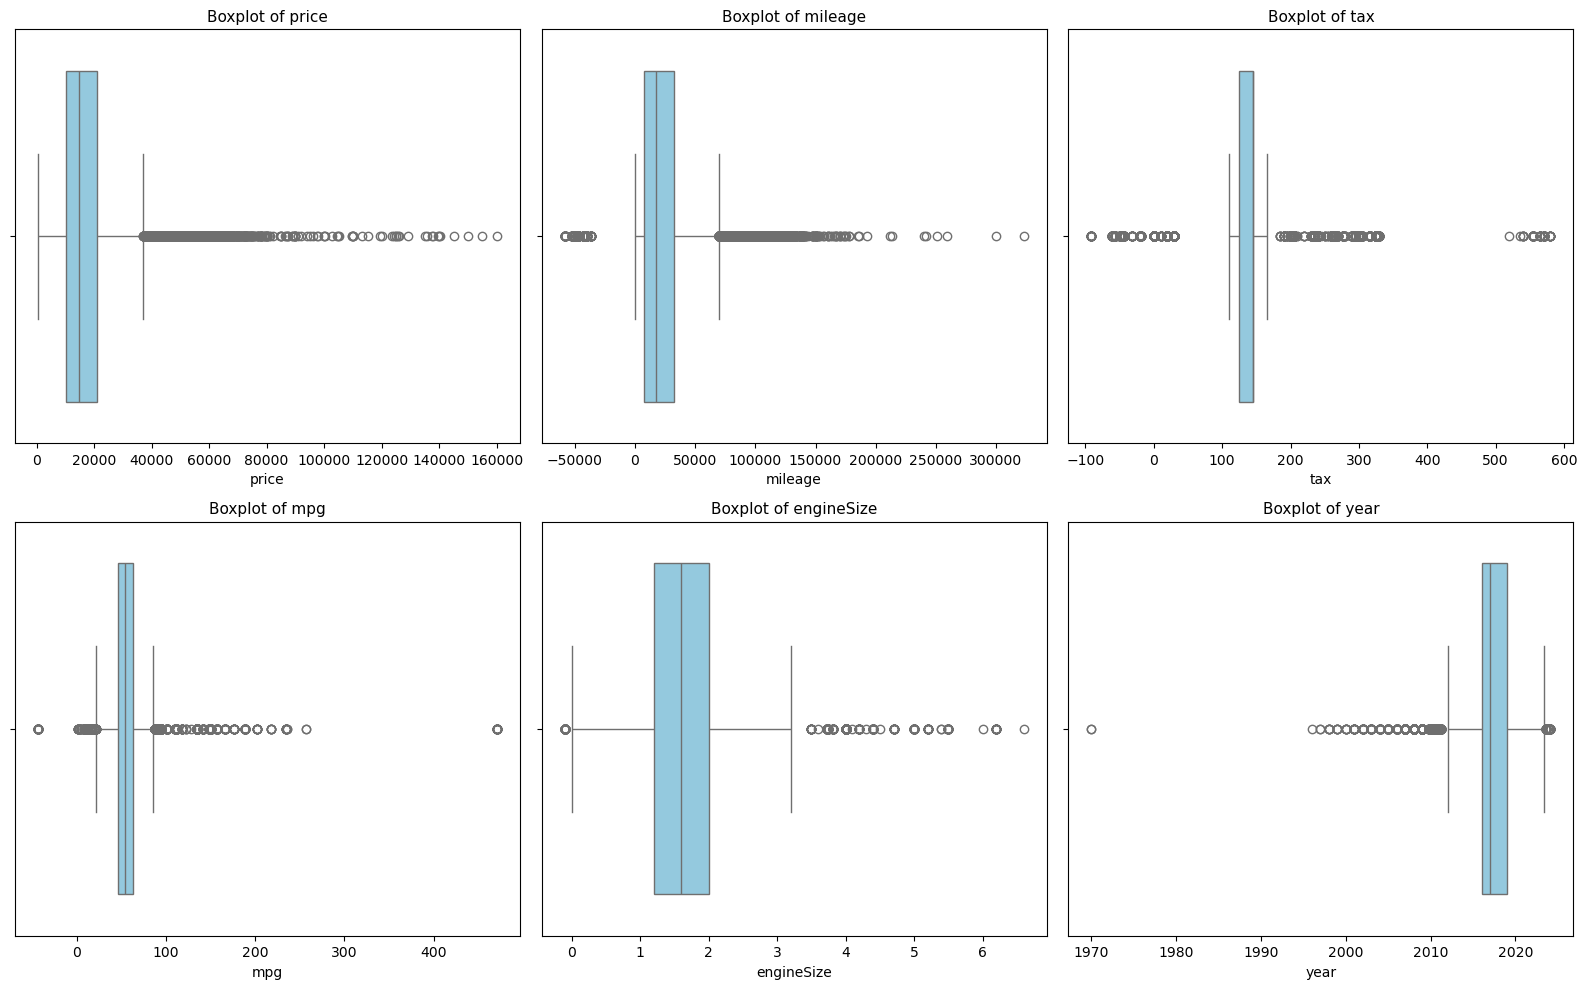

In [ ]:
num_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'year']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=11)
plt.tight_layout()
plt.show()

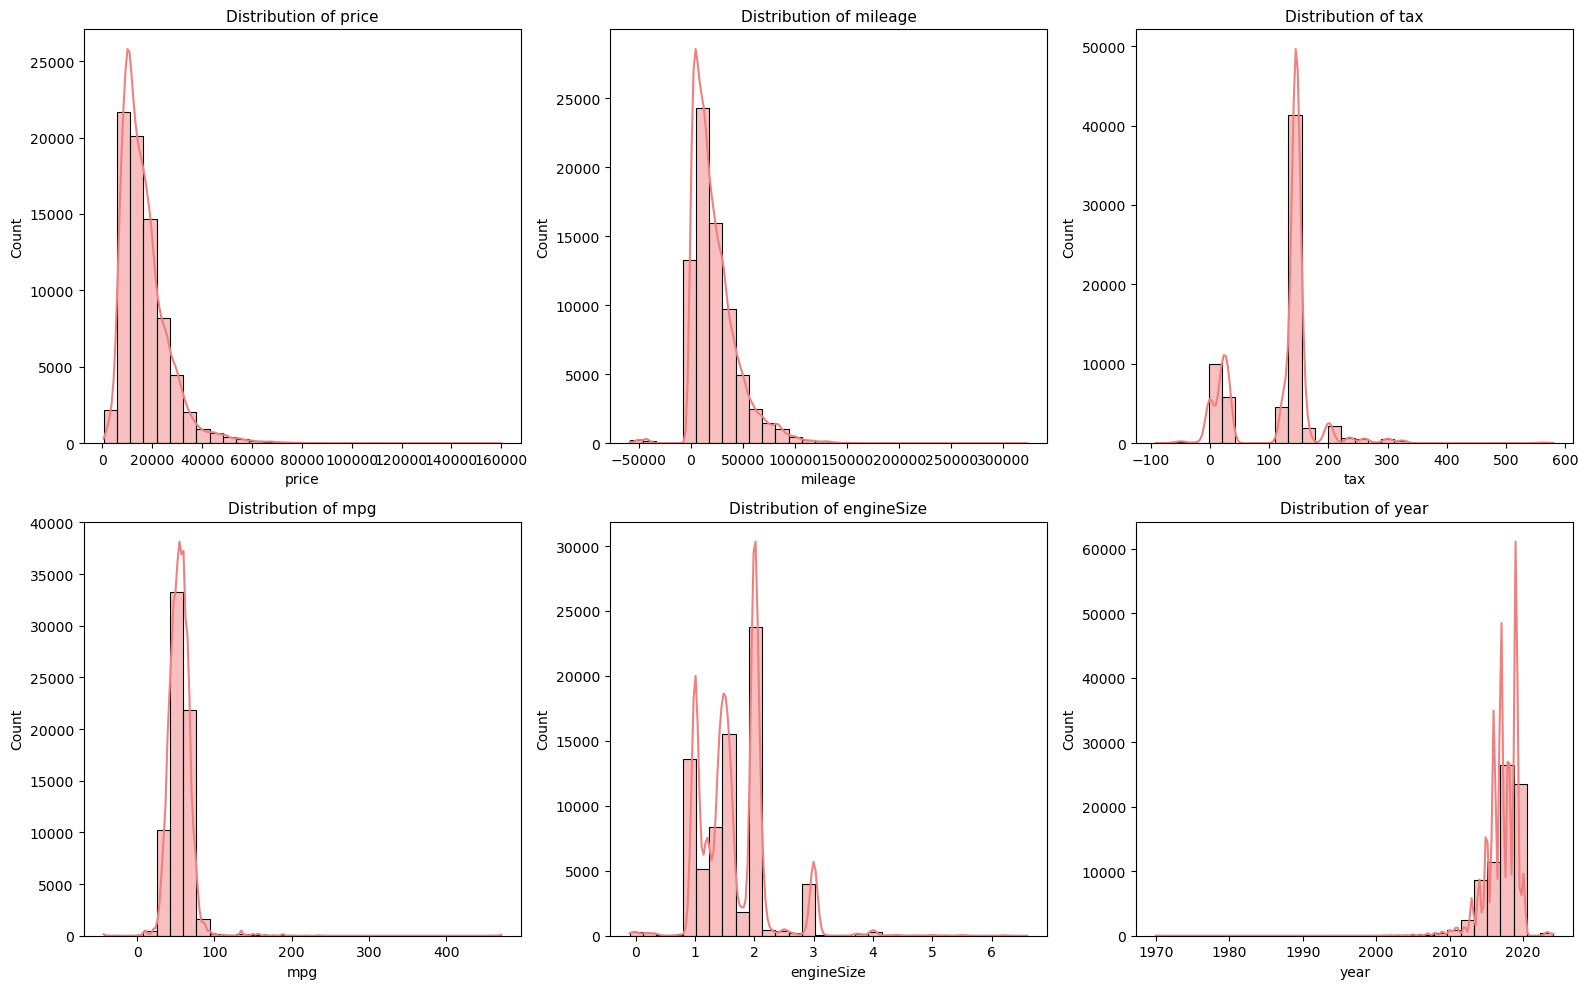

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color="lightcoral")
    plt.title(f"Distribution of {col}", fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
Train-Validation Split 

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price"])   
y = df["price"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (60778, 13)
Validation set size: (15195, 13)


In [ ]:
X_train_clean = X_train.copy()
X_val_clean = X_val.copy()

In [ ]:
# I decided not to impute all missing values uniformly. Instead, I applied feature-specific logic: median imputation for numeric fields with low missingness, mode for categorical ones, and group-wise imputation for mpg based on fuelType. For hasDamage, missing entries were treated as a separate category (‘Unknown’) since missingness likely reflects unreported vehicle condition.

In [ ]:
from sklearn.impute import SimpleImputer

num_general = ["tax", "previousOwners", "paintQuality%", "engineSize"]

median_imputer = SimpleImputer(strategy="median")
X_train_clean[num_general] = median_imputer.fit_transform(X_train_clean[num_general])
X_val_clean[num_general] = median_imputer.transform(X_val_clean[num_general])

In [ ]:
if "mpg" in X_train_clean.columns and "fuelType" in X_train_clean.columns:
    mpg_group_medians = X_train_clean.groupby("fuelType")["mpg"].median()

    def impute_mpg(row):
        if pd.isnull(row["mpg"]):
            return mpg_group_medians.get(row["fuelType"], X_train_clean["mpg"].median())
        return row["mpg"]

    X_train_clean["mpg"] = X_train_clean.apply(impute_mpg, axis=1)
    X_val_clean["mpg"] = X_val_clean.apply(impute_mpg, axis=1)


In [ ]:
cat_general = ["Brand", "model", "transmission", "fuelType"]

mode_imputer = SimpleImputer(strategy="most_frequent")
X_train_clean[cat_general] = mode_imputer.fit_transform(X_train_clean[cat_general])
X_val_clean[cat_general] = mode_imputer.transform(X_val_clean[cat_general])


In [ ]:
if "hasDamage" in X_train_clean.columns:
    X_train_clean["hasDamage"] = X_train_clean["hasDamage"].fillna("Unknown")
    X_val_clean["hasDamage"] = X_val_clean["hasDamage"].fillna("Unknown")

In [ ]:
missing_summary_train = X_train_clean.isnull().sum()
missing_summary_val = X_val_clean.isnull().sum()

print("Remaining missing values (train):", missing_summary_train.sum())
print("Remaining missing values (validation):", missing_summary_val.sum())

Remaining missing values (train): 2359
Remaining missing values (validation): 596


In [ ]:
remaining_missing = X_train_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print("Columns with remaining NaN values:")
display(remaining_missing)

Columns with remaining NaN values:


year       1200
mileage    1158
mpg           1
dtype: int64

In [ ]:
for col in ["year", "mileage", "mpg"]:
    if col in X_train_clean.columns:
        median_value = X_train_clean[col].median()
        X_train_clean[col].fillna(median_value, inplace=True)
        X_val_clean[col].fillna(median_value, inplace=True)

remaining_missing = X_train_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print("Columns with remaining NaN values after final cleaning:")
display(remaining_missing)

Columns with remaining NaN values after final cleaning:


C:\Users\USER\AppData\Local\Temp\ipykernel_11220\3648844205.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_clean[col].fillna(median_value, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11220\3648844205.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Series([], dtype: int64)

In [ ]:
# Here I inputed with the median since the proportion of missings is small and variables are stable and continuous 

<a id="data-exploration"></a>
## Data Exploration

<a id="pre-processing"></a>
## Pre-processing